In [5]:
from fastai import *
from fastai.vision import *

In [10]:
folder = 'zebra'
file = 'zebra.txt'

In [14]:
folder = 'lion'
file = 'lion.txt'

the code below creates a variable for our path where the data is stored and also creates a folder with destination name. Note that directories are written wrt to this jupiter notebook's location.

In [15]:
path = Path('data/animals')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [12]:
classes = ['zebra','lion']

In [16]:
download_images(path/file, dest, max_pics=200)

Basically fetches a list of URLs from the folder given as parameter 1, and downloads the images from the URLs to the destination folder. Doesn't download images that cannot be opened. Limits the max amount of images downloaded as well.

This verify_images method actually checks whether all the downloaded stuff are images and deletes if there are non-images.

In [17]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

zebra


lion


In [18]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

imagedatabunch is the databunch used for training and validating. It sets aside a part of our images for validation and uses the rest for training(amount decided by valid_pct). constant seed is used to ensure the same images are used for validation everytime we run this piece of code. Looking at the output below, we can see that the labels have been identified 

In [19]:
data.classes

['lion', 'zebra']

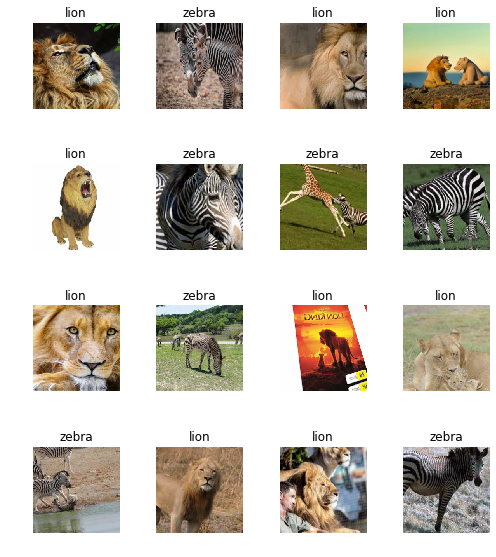

In [20]:
data.show_batch(rows=4, figsize=(7,8))

In [33]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(3, max_lr = 0.001)

epoch,train_loss,valid_loss,error_rate,time
0,0.842448,0.109548,0.025000,00:02
1,0.458968,0.042009,0.012500,00:02
2,0.323214,0.024080,0.012500,00:02


In [34]:
learn.fit_one_cycle(1, max_lr = 0.001)

epoch,train_loss,valid_loss,error_rate,time
0,0.031821,0.017252,0.012500,00:02


In [35]:
learn.fit_one_cycle(1, max_lr = 0.001)

epoch,train_loss,valid_loss,error_rate,time
0,0.027984,0.013846,0.012500,00:02


In [37]:
learn.fit_one_cycle(1, max_lr = 0.001)

epoch,train_loss,valid_loss,error_rate,time
0,0.022230,0.008241,0.000000,00:02


In [40]:
learn.save('weights-1')

In [41]:
learn.unfreeze()

In [42]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


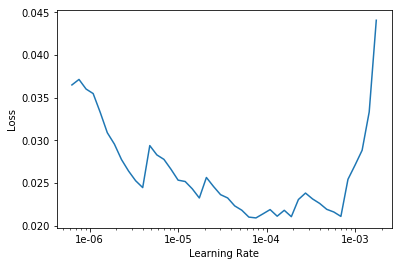

In [43]:
learn.recorder.plot()

In [44]:
learn.fit_one_cycle(2, max_lr=slice(2e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.026423,0.009628,0.012500,00:03
1,0.015445,0.009082,0.000000,00:02


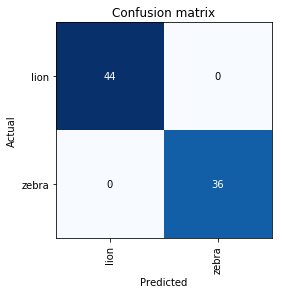

In [38]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()